# Importation des differentes bibliothèques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Chargement des données

In [5]:
data= pd.read_csv('german_credit_data _train.csv')

# EDA(Exploratory of Data Analysis)
Data preparation

In [6]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
#Supression de la colonne Unnamed : 0
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
#Affichage de la taille du dataset
data.shape

(1000, 10)

In [9]:
#Affichage des informations sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Statistiques descriptives

In [10]:
#Affichage des statistiques descriptives
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
#Affichage des valeurs manquantes
data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


Seul les deux colonnes 'Saving accounts' et 'Checking account' ont des valeurs nulles

In [12]:
#Affichage des valeurs dupliquées
data.duplicated().sum()

0

Le dataset ne contient pas de valeurs dupliquées

In [13]:
data['Job'].value_counts()

,count
Job,
2,630
1,200
3,148
0,22


In [14]:
data['Sex'].value_counts()

,count
Sex,
male,690
female,310


In [15]:
data['Housing'].value_counts()

,count
Housing,
own,713
rent,179
free,108


In [16]:
data['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


In [17]:
data['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [18]:
data['Purpose'].value_counts()

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


# Gestion des valeurs manquantes
Les valeurs manquantes sont remplacées par 'unknown' dans les colonnes 'Saving accounts' et 'Checking account'

In [19]:
data['Saving accounts'].fillna('unknown', inplace=True)

<ipython-input-19-d410f50db92c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Saving accounts'].fillna('unknown', inplace=True)


In [20]:
data['Checking account'].fillna('unknown', inplace=True)

<ipython-input-20-72395d84679f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Checking account'].fillna('unknown', inplace=True)


# Analyse visuelle des variables catégorielles

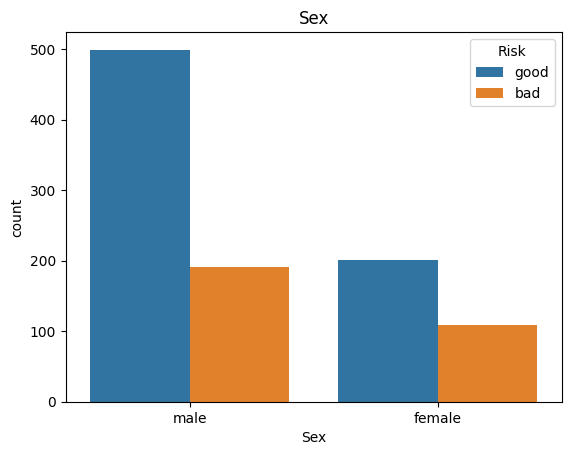

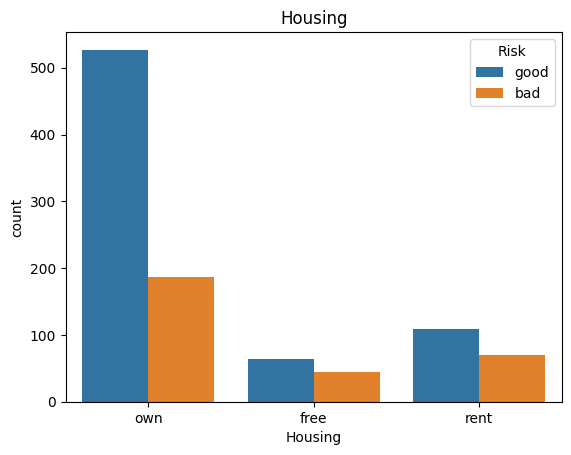

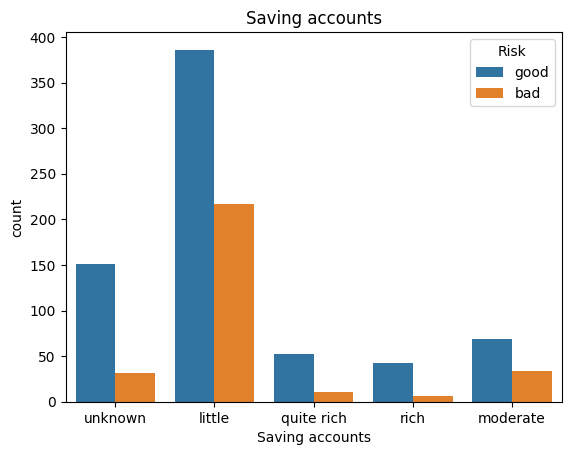

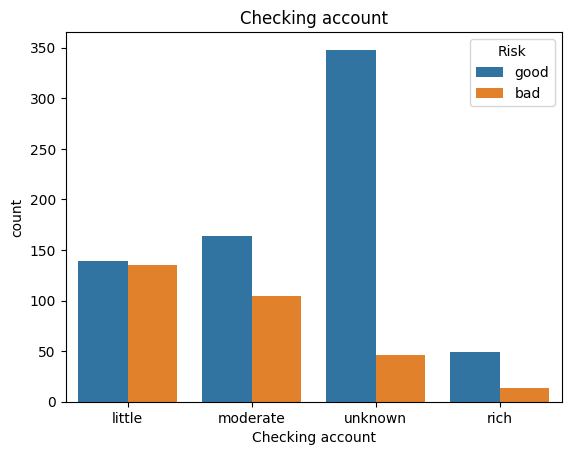

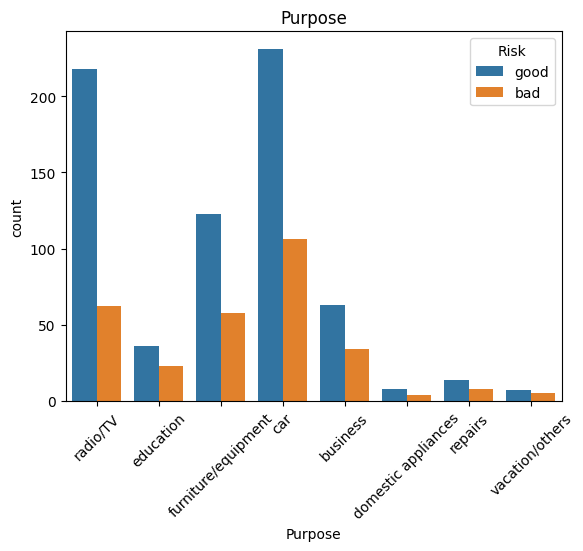

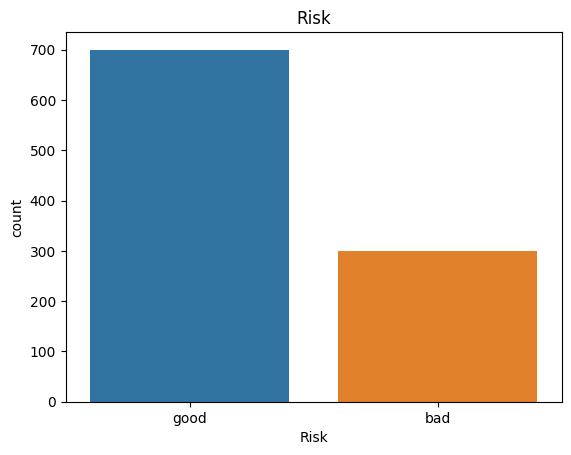

In [21]:
var_cat = ['Sex','Housing','Saving accounts','Checking account','Purpose','Risk']

for i in var_cat:
  plt.figure()
  sns.countplot(x = i, data = data, hue="Risk")
  plt.title(i)
  if i == "Purpose":
      plt.xticks(rotation=45)

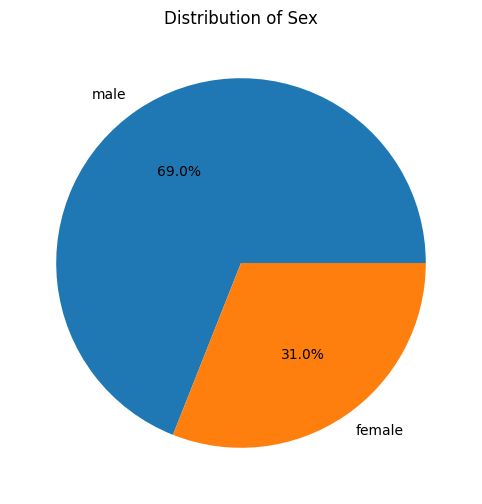

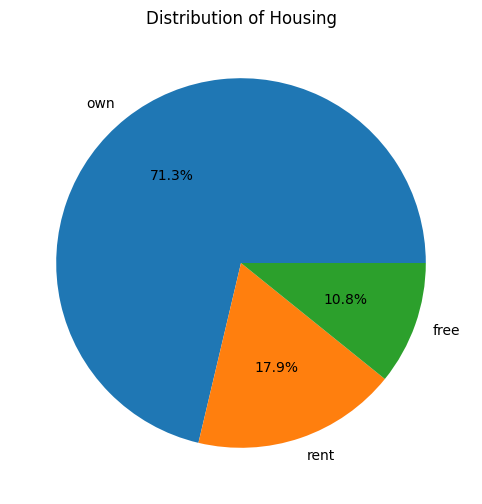

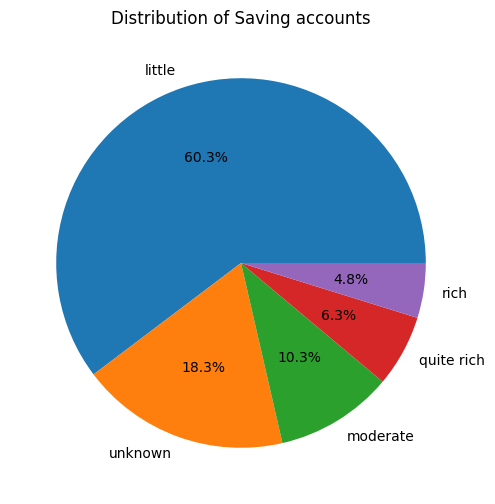

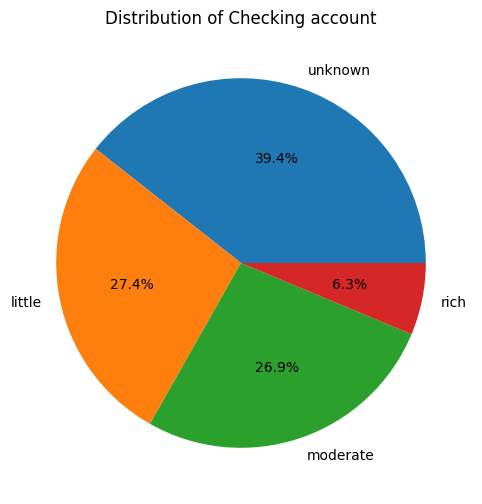

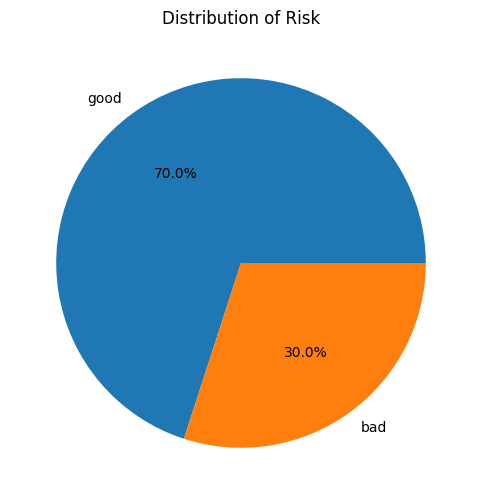

In [22]:
for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk']:
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hide y-axis label
    plt.show()

La classe 'good' est majoritaire par rapport à la classe 'bad'

Regroupement des catégories dans la colonnes purpose pour faciliter le traitement

In [23]:
purpose_mapping = {
    'radio/TV': 'Electronique et Electroménager',
    'domestic appliances': 'Electronique et Electroménager',
    'furniture/equipment': 'Electronique et Electroménager',
    'car' : 'Vehicule',
    'business' : 'Business',
    'education' : 'Education',
    'repairs' : 'Réparation',
    'vacation/others' : 'Autres'
}

data ['Purpose'] = data['Purpose'].map(purpose_mapping)

# Visualisation des variables numériques

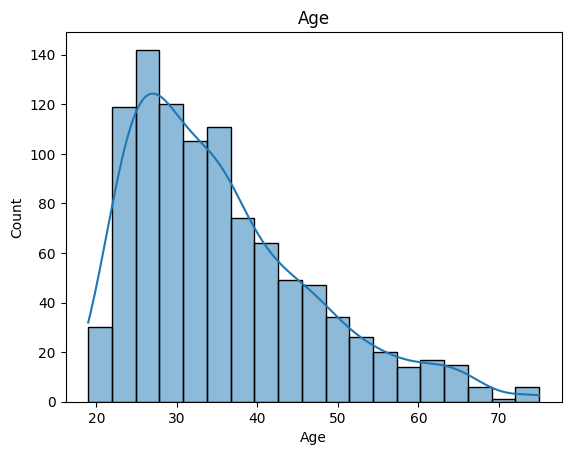

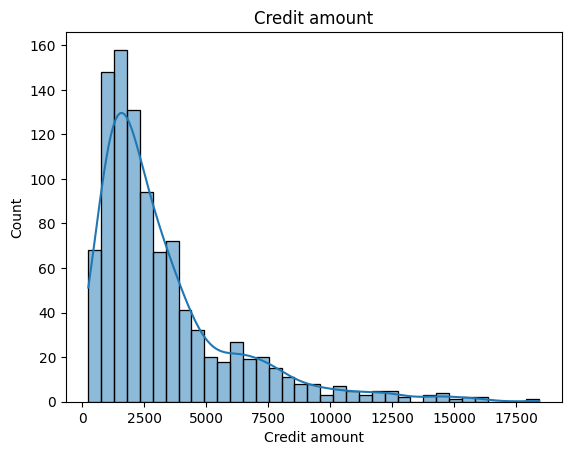

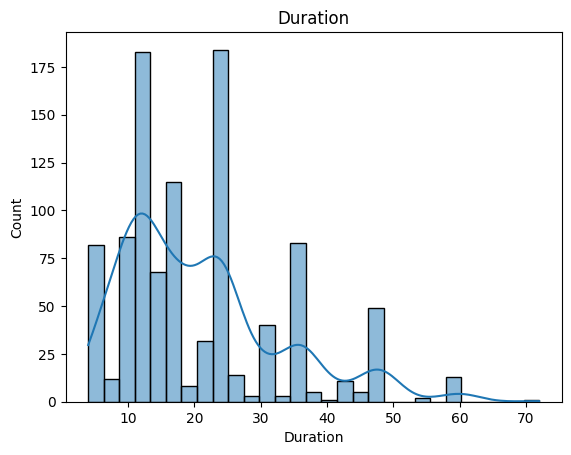

In [24]:
var_num = ['Age','Credit amount','Duration']

for i in var_num:
  plt.figure()
  sns.histplot(x = data[i],kde=True)
  plt.title(i)

Les différentes variables n'ont pas la même distribution,elles sont asymétriques, il serait alors intéressant de les standartisés pour les modèles paramétriques

# Analyse de la colinéarité ou multicolinéarité entre les variables

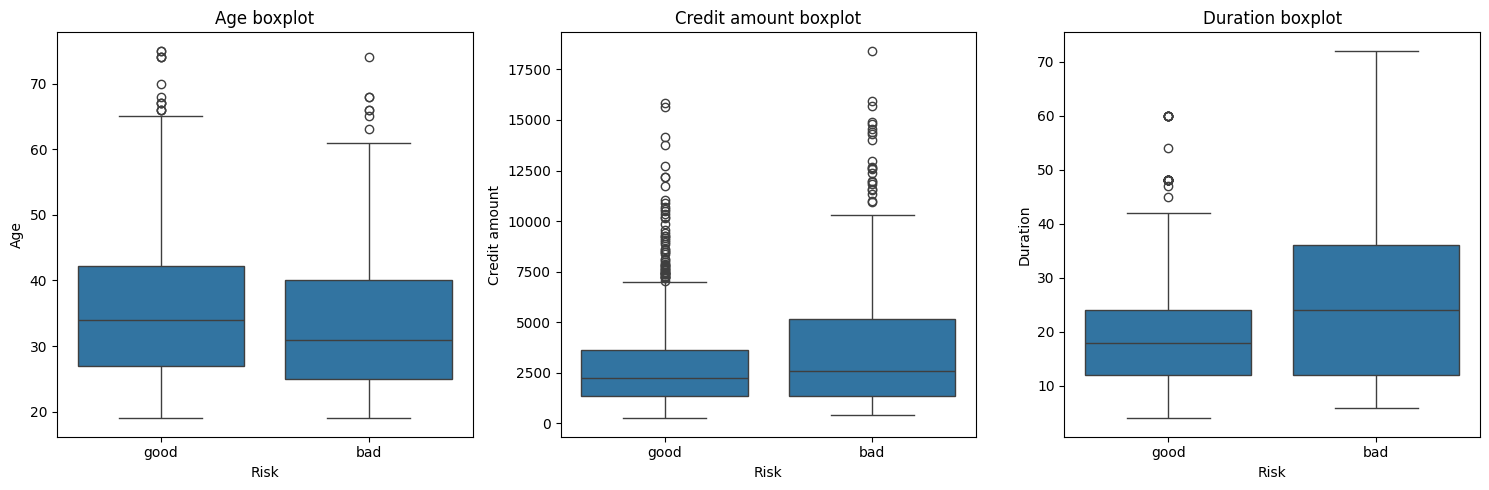

In [25]:
var_num = ['Age', 'Credit amount', 'Duration']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(var_num, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Risk', y=feature, data=data)
    plt.xlabel('Risk')
    plt.ylabel(feature)
    plt.title(f'{feature} boxplot')

plt.tight_layout()
plt.show()


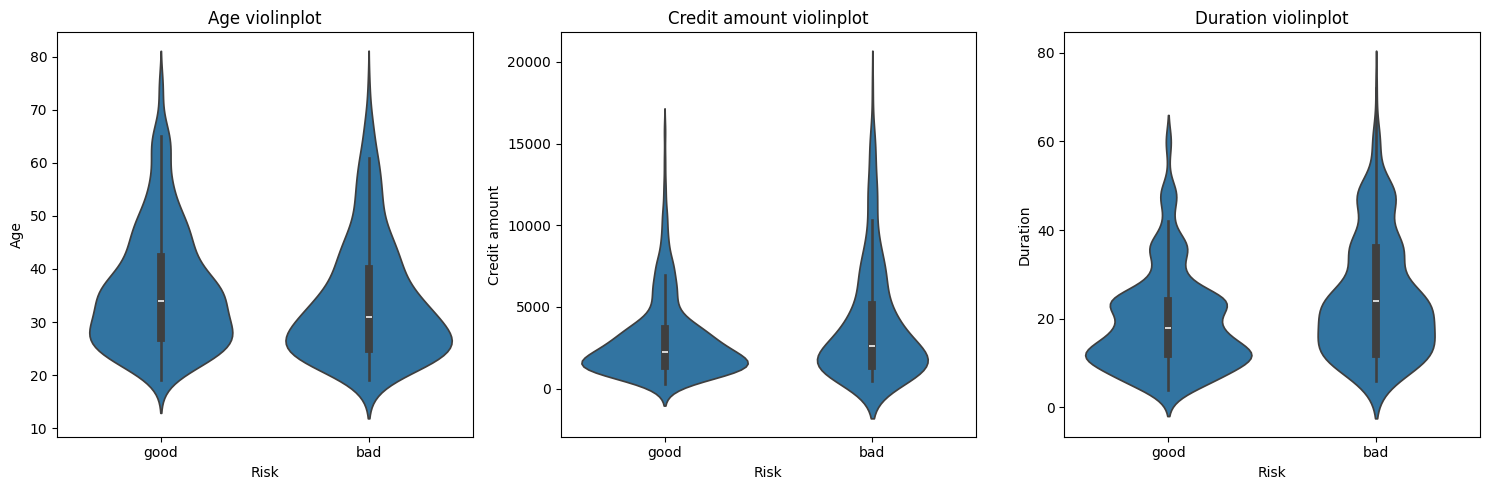

In [26]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(var_num, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Risk', y=feature, data=data)
    plt.xlabel('Risk')
    plt.ylabel(feature)
    plt.title(f'{feature} violinplot')

plt.tight_layout()
plt.show()

In [27]:
# Créer une copie pour ne pas modifier les données originales
data_copy = data.copy()

# Convertir Risk en numérique : Good -> 1, Bad -> 0
data_copy['Risk_numeric'] = data_copy['Risk'].map({'Good': 1, 'Bad': 0})


                    Age  Credit amount  Duration  Risk_numeric
Age            1.000000       0.032716 -0.036136           NaN
Credit amount  0.032716       1.000000  0.624984           NaN
Duration      -0.036136       0.624984  1.000000           NaN
Risk_numeric        NaN            NaN       NaN           NaN


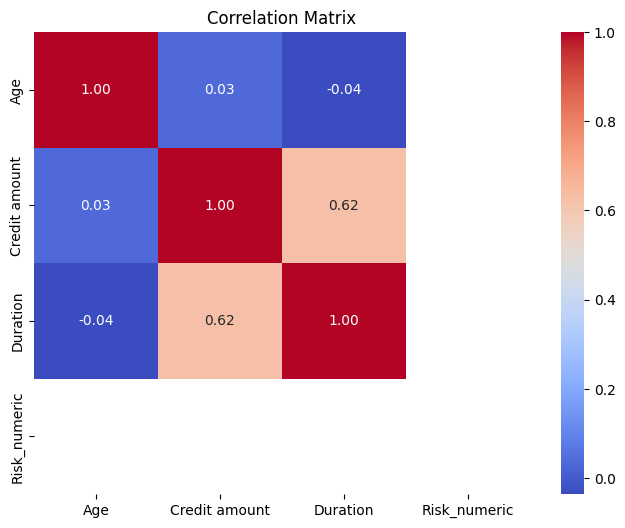

In [28]:
# Select numerical features and the target variable
numerical_features = ['Age', 'Credit amount', 'Duration']
target_variable = 'Risk_numeric'

# Create a subset of the DataFrame with only numerical features and the target variable
correlation_data = data_copy[numerical_features + [target_variable]]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Les différentes variables comme Duration et Credit amount sont correlées.

# Encodage des variables catégorielles


1.   **LabelEncoder** pour les variables 'Sex', 'Risk' ,'Saving accounts' et 'Checking account'
2.  **One-Hot Encoding** pour les variables 'Purpose' et 'Housing'



In [29]:
# Initialiser l'encodeur
le = LabelEncoder()

# Encoder 'Sex' et 'Risk'
data['Sex'] = le.fit_transform(data['Sex'])
data['Risk'] = le.fit_transform(data['Risk'])


In [30]:
data = pd.get_dummies(data, columns=['Housing'], drop_first=True)

In [31]:
# Encoder 'Saving accounts' et 'Checking account'
data['Saving accounts'] = le.fit_transform(data['Saving accounts'])
data['Checking account'] = le.fit_transform(data['Checking account'])


In [32]:
# One-Hot Encoding sur Purpose
data = pd.get_dummies(data, columns=['Purpose'])

Vérification du nouveau dataset avec les variables catégorielles encodées

In [33]:
data.head()


,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Housing_own,Housing_rent,Purpose_Autres,Purpose_Business,Purpose_Education,Purpose_Electronique et Electroménager,Purpose_Réparation,Purpose_Vehicule
0,67,1,2,4,0,1169,6,1,True,False,False,False,False,True,False,False
1,22,0,2,0,1,5951,48,0,True,False,False,False,False,True,False,False
2,49,1,1,0,3,2096,12,1,True,False,False,False,True,False,False,False
3,45,1,2,0,0,7882,42,1,False,False,False,False,False,True,False,False
4,53,1,2,0,0,4870,24,0,False,False,False,False,False,False,False,True


#Préparation des données


1.   Division des données en données d'entraînement et de test
2.   Standardisation sur les colonnes numériques



In [34]:
# Séparation des features (X) et de la target (y)
X = data.drop('Risk', axis=1)  # 'Risk' est la variable cible
y = data['Risk']

# Diviser le dataset en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Appliquer la standardisation sur les colonnes numériques
scaler = StandardScaler()

# On standardise uniquement les données pour KNN, SVM et Logistic Regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Modélisation
Sept modèles ont été utilisés afin de choisir le meilleur et de le déployer.
Parmi ces modèles nous avons :

1.   KNN
2.   SVM
3.   Logistic Regression
4.   Random Forest
5.   XGBoost
1.   LightGBM
6.  GradientBoostingClassifier

Pour les trois premiers modèles, l'entraînement fut effectué avec les données standardisées mais pour les quatre derniers,seules les données brutes ont été utilisées car il ne sont pas sensibles à la variation.


Pour bosster les performances de notre modèle,nous utilisons GridSearchCV pour le choix des meilleurs paramètres et le cross-validation

#KNN

In [36]:
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn.fit(X_train_scaled, y_train)

print("Meilleurs paramètres KNN:", knn.best_params_)
y_pred_knn = knn.predict(X_test_scaled)
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))


Meilleurs paramètres KNN: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy KNN: 0.72


#SVM

In [37]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm.fit(X_train_scaled, y_train)

print("Meilleurs paramètres SVM:", svm.best_params_)
y_pred_svm = svm.predict(X_test_scaled)
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))


Meilleurs paramètres SVM: {'C': 1, 'kernel': 'linear'}
Accuracy SVM: 0.755


#Logistic Regression

In [38]:
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l2']}
logreg = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=5, n_jobs=-1)
logreg.fit(X_train_scaled, y_train)

print("Meilleurs paramètres Logistic Regression:", logreg.best_params_)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logreg))

Meilleurs paramètres Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Accuracy Logistic Regression: 0.76


#RandomForest

In [39]:
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
rf.fit(X_train, y_train)

print("Meilleurs paramètres Random Forest:", rf.best_params_)
y_pred_rf = rf.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))

Meilleurs paramètres Random Forest: {'max_depth': 10, 'n_estimators': 200}
Accuracy Random Forest: 0.765


#LightGBM

In [40]:
from lightgbm import LGBMClassifier

# Définir les paramètres
lgbm_params = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]}

# Utiliser GridSearchCV avec LightGBM
lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_params, cv=5, n_jobs=-1)
lgbm.fit(X_train, y_train)

print("Meilleurs paramètres LightGBM:", lgbm.best_params_)
y_pred_lgbm = lgbm.predict(X_test)
print("Accuracy LightGBM:", accuracy_score(y_test, y_pred_lgbm))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


#XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Définir les paramètres à tester
n_estimators = [100, 200, 500]
learning_rates = [0.01, 0.1, 0.2]

best_accuracy = 0
best_params = {}

# Boucle sur les combinaisons de paramètres
for n in n_estimators:
    for lr in learning_rates:
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=n, learning_rate=lr)
        xgb.fit(X_train, y_train)
        y_pred_xgb = xgb.predict(X_test)
        acc = accuracy_score(y_test, y_pred_xgb)

        # Vérifier si l'accuracy est la meilleure
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {'n_estimators': n, 'learning_rate': lr}

print("Meilleurs paramètres XGBoost:", best_params)
print("Meilleure accuracy XGBoost:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:47:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:47:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:47:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:47:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:47:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Meilleurs paramètres XGBoost: {'n_estimators': 200, 'learning_rate': 0.1}
Meilleure accuracy XGBoost: 0.77


#GradientBoostingClassifier

In [42]:
#  Définir la grille d'hyperparamètres à tester
gb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#  Initialiser le GridSearchCV pour GradientBoostingClassifier
gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, n_jobs=-1, verbose=2)

#  Entraîner le modèle avec recherche des meilleurs hyperparamètres
gb.fit(X_train, y_train)

#  Afficher les meilleurs hyperparamètres
print("\n Meilleurs paramètres Gradient Boosting:", gb.best_params_)

#  Prédictions sur le jeu de test
y_pred_gb = gb.predict(X_test)

print("Accuracy Gradient Boosting:", accuracy_score(y_test, y_pred_gb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Meilleurs paramètres Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy Gradient Boosting: 0.77


#Affichage des performances de chaque modèle

In [43]:
# Évaluer les performances de chaque modèle
models = {
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred_logreg,
    'Random Forest': y_pred_rf,
    'LightGBM': y_pred_lgbm,
    'XGBoost': y_pred_xgb,
    'Gradient Boosting': y_pred_gb
}

for model_name, y_pred in models.items():
    print(f"\n🔍 {model_name} - Rapport de classification")
    print(classification_report(y_test, y_pred))
    print(f"\n🔍 {model_name} - Matrice de confusion")
    print(confusion_matrix(y_test, y_pred))



🔍 KNN - Rapport de classification
              precision    recall  f1-score   support

           0       0.54      0.34      0.42        59
           1       0.76      0.88      0.82       141

    accuracy                           0.72       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.70      0.72      0.70       200


🔍 KNN - Matrice de confusion
[[ 20  39]
 [ 17 124]]

🔍 SVM - Rapport de classification
              precision    recall  f1-score   support

           0       0.65      0.37      0.47        59
           1       0.78      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.74      0.76      0.73       200


🔍 SVM - Matrice de confusion
[[ 22  37]
 [ 12 129]]

🔍 Logistic Regression - Rapport de classification
              precision    recall  f1-score   support

           0       0.66      0.39      0.49        59
          

# Affichage de la courbe ROC de notre meilleur modèle : Gradient Boosting

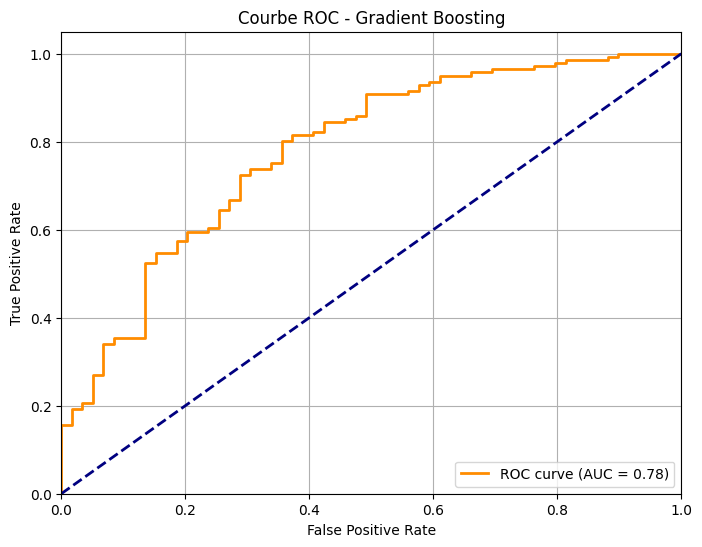

In [44]:
# Prédictions des probabilités pour la classe positive (classe '1')
y_prob_gb = gb.predict_proba(X_test)[:, 1]  # on récupère la probabilité pour la classe positive

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe (AUC)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # ligne diagonale (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Enregistrement du meilleur modèle

Le meilleur modèle choisi est le GradientBoosting Classifier

In [57]:
# Enregistrer le modèle sélectionné par GridSearchCV
model = gb.best_estimator_
joblib.dump(model, 'Gradient_boosting_model.pkl')

['Gradient_boosting_model.pkl']

Chargement du modèle

In [58]:
model = joblib.load('/content/Gradient_boosting_model.pkl')

In [59]:
print(type(model))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [67]:
# Sauvegarde des encodeurs
le_sex = LabelEncoder()
le_sex.fit(['male', 'female'])  # Utilise les catégories uniques de 'Sex'
joblib.dump(le_sex, 'sex_encoder.pkl')

le_saving = LabelEncoder()
le_saving.fit(['little', 'quite rich', 'rich', 'none'])  # Ajuste selon les catégories uniques de 'Saving accounts'
joblib.dump(le_saving, 'saving_accounts_encoder.pkl')

le_checking = LabelEncoder()
le_checking.fit(['little', 'no known savings', 'rich', 'none'])  # Ajuste selon les catégories uniques de 'Checking account'
joblib.dump(le_checking, 'checking_account_encoder.pkl')

# Sauvegarde des transformations One-Hot pour 'Housing' et 'Purpose'
# Tu peux créer une structure de données pour les colonnes one-hot
housing_columns = ['own', 'free', 'rent']  # Ajuste selon les catégories uniques de 'Housing'
purpose_columns = ['radio/tv', 'education', 'new car', 'used car', 'furniture/equipment', 'radio/tv', 'domestic appliance', 'repairs', 'education']  # Ajuste selon les catégories uniques de 'Purpose'

joblib.dump(housing_columns, 'housing_columns.pkl')
joblib.dump(purpose_columns, 'purpose_columns.pkl')


['purpose_columns.pkl']